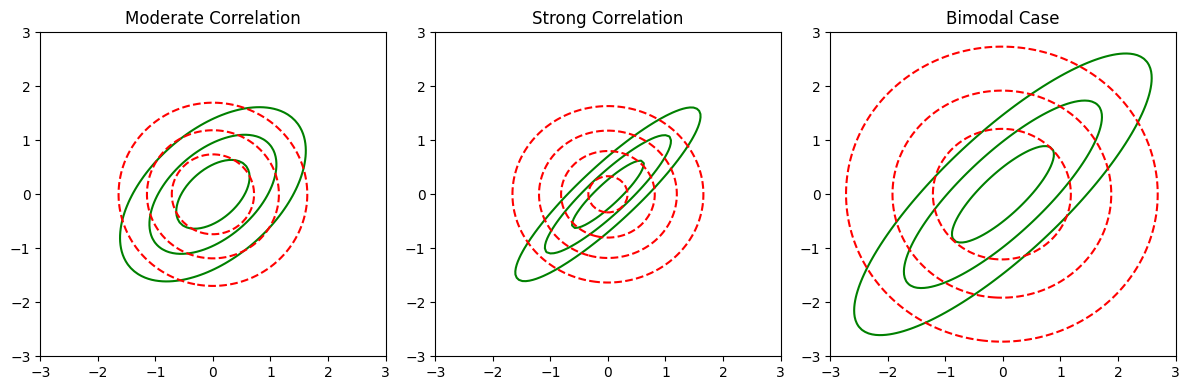

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

def generate_correlated_data(mean, cov, size=1000):
    """Generate samples from a multivariate Gaussian."""
    return np.random.multivariate_normal(mean, cov, size)

def plot_contours(true_mean, true_cov, approx_mean, approx_cov, ax, title):
    """Plot true and mean-field approximated contours."""
    x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    pos = np.dstack((x, y))

    # True correlated Gaussian
    rv_true = multivariate_normal(true_mean, true_cov)
    ax.contour(x, y, rv_true.pdf(pos), levels=3, colors='green', linestyles='solid', linewidths=1.5)

    # Mean-field approximation (diagonal Gaussian)
    rv_approx = multivariate_normal(approx_mean, approx_cov)
    ax.contour(x, y, rv_approx.pdf(pos), levels=4, colors='red', linestyles='dashed', linewidths=1.5)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Case 1: Moderate correlation
true_mean = [0, 0]
true_cov = [[1.0, 0.5], [0.5, 1.0]]
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))  # Mean-field approx
plot_contours(true_mean, true_cov, true_mean, approx_cov, axes[0], "Moderate Correlation")

# Case 2: Strong correlation
true_cov = [[1.0, 0.9], [0.9, 1.0]]
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))
plot_contours(true_mean, true_cov, true_mean, approx_cov, axes[1], "Strong Correlation")

# Case 3: Bimodal distribution
data1 = generate_correlated_data([-1.5, -1.5], [[0.5, 0], [0, 0.5]])
data2 = generate_correlated_data([1.5, 1.5], [[0.5, 0], [0, 0.5]])
data = np.vstack((data1, data2))
approx_mean = np.mean(data, axis=0)
approx_cov = np.diag(np.var(data, axis=0))
plot_contours(true_mean, np.cov(data.T), approx_mean, approx_cov, axes[2], "Bimodal Case")

plt.tight_layout()
plt.show()


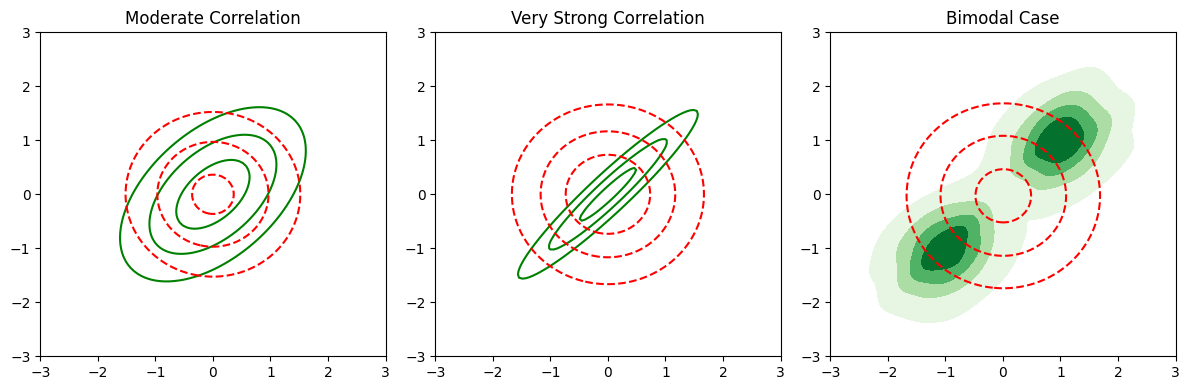

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

def generate_correlated_data(mean, cov, size=1000):
    """Generate samples from a multivariate Gaussian."""
    return np.random.multivariate_normal(mean, cov, size)

def plot_contours(true_mean, true_cov, approx_mean, approx_cov, ax, title):
    """Plot true and mean-field approximated contours."""
    x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
    pos = np.dstack((x, y))

    # True correlated Gaussian
    rv_true = multivariate_normal(true_mean, true_cov)
    ax.contour(x, y, rv_true.pdf(pos), levels=3, colors='green', linestyles='solid', linewidths=1.5)

    # Mean-field approximation (diagonal Gaussian)
    rv_approx = multivariate_normal(approx_mean, approx_cov)
    ax.contour(x, y, rv_approx.pdf(pos), levels=3, colors='red', linestyles='dashed', linewidths=1.5)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(title)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Case 1: Moderate correlation
true_mean = [0, 0]
true_cov = [[1.0, 0.5], [0.5, 1.0]]
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))  # Mean-field approx
plot_contours(true_mean, true_cov, true_mean, approx_cov, axes[0], "Moderate Correlation")

# Case 2: Very strong correlation (more stretched)
true_cov = [[1.0, 0.95], [0.95, 1.0]]  # Almost fully correlated
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))  # Mean-field still diagonal
plot_contours(true_mean, true_cov, true_mean, approx_cov, axes[1], "Very Strong Correlation")

# Case 3: Bimodal distribution
ax = axes[2]
data1 = generate_correlated_data([-1, -1], [[0.2, 0], [0, 0.2]], size=500)
data2 = generate_correlated_data([1, 1], [[0.2, 0], [0, 0.2]], size=500)
data = np.vstack((data1, data2))

# KDE plot for the true bimodal distribution
sns.kdeplot(x=data[:, 0], y=data[:, 1], ax=ax, levels=5, cmap="Greens", fill=True)

# Mean-field approximation (single Gaussian fit)
approx_mean = np.mean(data, axis=0)
approx_cov = np.diag(np.var(data, axis=0))
rv_approx = multivariate_normal(approx_mean, approx_cov)

# Overlay mean-field contours
x, y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
pos = np.dstack((x, y))
ax.contour(x, y, rv_approx.pdf(pos), levels=3, colors='red', linestyles='dashed', linewidths=1.5)

ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_title("Bimodal Case")

plt.tight_layout()
plt.show()


[[0.99757956 0.        ]
 [0.         1.0055512 ]]


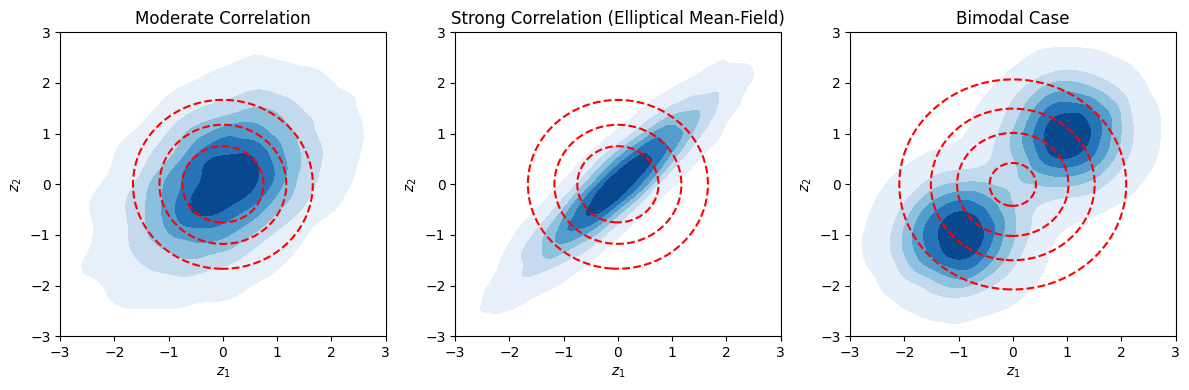

In [68]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

def generate_correlated_data(mean, cov, size=10000):
    """Generate samples from a multivariate Gaussian."""
    return np.random.multivariate_normal(mean, cov, size)

def plot_kde_and_mean_field(data, approx_mean, approx_cov, ax, title):
    """Plot KDE for the true distribution and contour for the mean-field approximation."""
    sns.kdeplot(x=data[:, 0], y=data[:, 1], ax=ax, fill=True, cmap="Blues", levels=7)

    x, y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
    pos = np.dstack((x, y))

    # Mean-field approximation (diagonal Gaussian)
    rv_approx = multivariate_normal(approx_mean, approx_cov)
    ax.contour(x, y, rv_approx.pdf(pos), levels=4, colors='red', linestyles='dashed', linewidths=1.5)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    ax.set_title(title)
    ax.set_xlabel(r"$z_1$")
    ax.set_ylabel(r"$z_2$")

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Case 1: Moderate correlation
true_mean = [0, 0]
true_cov = [[1.0, 0.4], [0.4, 1.0]]
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))  # Mean-field approximation (diagonal covariance)
plot_kde_and_mean_field(data, true_mean, approx_cov, axes[0], "Moderate Correlation")

# Case 2: Strong correlation but NOT on y=x diagonal
true_mean = [0, 0]
true_cov = [[1, 0.9], [0.9, 1]]  # Shifted off the y=x diagonal
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))  # Mean-field approx now elliptical
plot_kde_and_mean_field(data, true_mean, approx_cov, axes[1], "Strong Correlation (Elliptical Mean-Field)")

print(approx_cov)

# Case 3: Bimodal distribution
k = 1
data1 = generate_correlated_data([-k, -k], [[0.5, 0], [0, 0.5]])
data2 = generate_correlated_data([k, k], [[0.5, 0], [0, 0.5]])
data = np.vstack((data1, data2))

# Mean-field approximation: Single Gaussian fit
approx_mean = np.mean(data, axis=0)
approx_cov = np.diag(np.var(data, axis=0))  # Doesn't capture bimodality
plot_kde_and_mean_field(data, approx_mean, approx_cov, axes[2], "Bimodal Case")

plt.tight_layout()
plt.show()


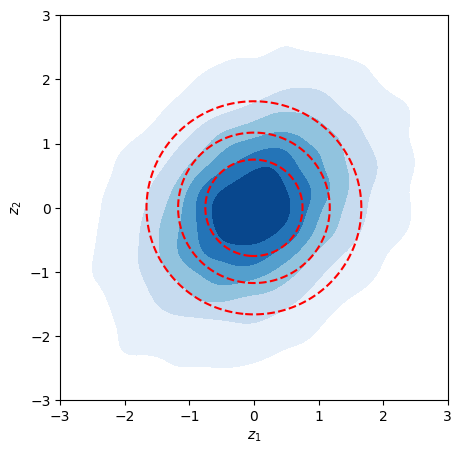

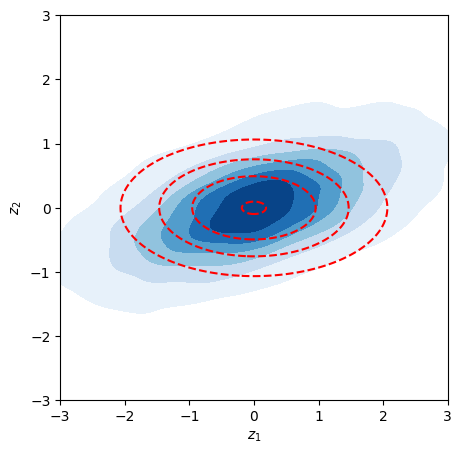

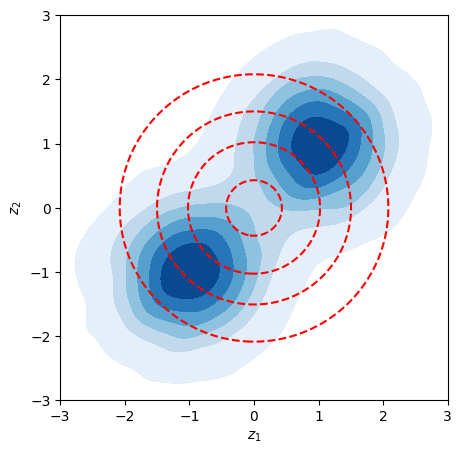

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal

def generate_correlated_data(mean, cov, size=10000):
    """Generate samples from a multivariate Gaussian."""
    return np.random.multivariate_normal(mean, cov, size)

def plot_kde_and_mean_field(data, approx_mean, approx_cov, title):
    """Plot KDE for the true distribution and contour for the mean-field approximation."""
    fig, ax = plt.subplots(figsize=(5, 5))  # Separate figure for each plot

    sns.kdeplot(x=data[:, 0], y=data[:, 1], ax=ax, fill=True, cmap="Blues", levels=7)

    x, y = np.meshgrid(np.linspace(-3, 3, 1000), np.linspace(-3, 3, 1000))
    pos = np.dstack((x, y))

    # Mean-field approximation (diagonal Gaussian)
    rv_approx = multivariate_normal(approx_mean, approx_cov)
    ax.contour(x, y, rv_approx.pdf(pos), levels=4, colors='red', linestyles='dashed', linewidths=1.5)

    ax.set_xlim(-3, 3)
    ax.set_ylim(-3, 3)
    # ax.set_title(title)
    ax.set_xlabel(r"$z_1$")
    ax.set_ylabel(r"$z_2$")

    plt.show()  # Show each figure separately (you can replace this with plt.savefig())

# Case 1: Moderate correlation
true_mean = [0, 0]
true_cov = [[1.0, 0.3], [0.3, 1.0]]
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))  # Mean-field approximation (diagonal covariance)
plot_kde_and_mean_field(data, true_mean, approx_cov, "Moderate Correlation")

# Case 2: Strong correlation but NOT on y=x diagonal
true_mean = [0, 0]
true_cov = [[1.5, 0.4], [0.4, 0.4]]  # Shifted off the y=x diagonal
data = generate_correlated_data(true_mean, true_cov)
approx_cov = np.diag(np.var(data, axis=0))  # Mean-field approx now elliptical
plot_kde_and_mean_field(data, true_mean, approx_cov, "Strong Correlation (Elliptical Mean-Field)")

# Case 3: Bimodal distribution
k = 1
data1 = generate_correlated_data([-k, -k], [[0.5, 0], [0, 0.5]])
data2 = generate_correlated_data([k, k], [[0.5, 0], [0, 0.5]])
data = np.vstack((data1, data2))

# Mean-field approximation: Single Gaussian fit
approx_mean = np.mean(data, axis=0)
approx_cov = np.diag(np.var(data, axis=0))  # Doesn't capture bimodality
plot_kde_and_mean_field(data, approx_mean, approx_cov, "Bimodal Case")
